# Init

In [27]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
import os     
import pydotplus
from IPython.display import Image 
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
os.environ["PATH"] += os.pathsep + 'C:\\Users\\KJCHEN\\Miniconda3\\envs\\FDA\\Library\\bin\\graphviz'

---

# Original data

In [31]:
titanic = pd.read_csv('train.csv')

In [32]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
734,735,0,2,"Troupiansky, Mr. Moses Aaron",male,23.0,0,0,233639,13.0000,NaN,S
725,726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,NaN,S
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
426,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,NaN,S
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S


In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


---

# Drop Columns

In [34]:
cols_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
titanic.drop(cols_drop, axis=1, inplace=True)

---

# Handle Missing Values

In [35]:
age = titanic['Age']
age.fillna(value=age.mean(), inplace=True)

In [36]:
embarked = titanic['Embarked']
embarked.fillna(value=embarked.value_counts().idxmax(), inplace=True)

---

# Analysis / Modification

## Pclass

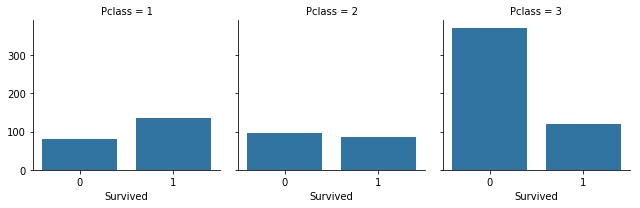

In [37]:
# Analysis
sns.FacetGrid(titanic, col='Pclass').map(sns.countplot, 'Survived', order=[0,1]);

# Modification
col = 'Pclass'
one_hot = pd.get_dummies(titanic[col], prefix=col)
titanic = pd.concat([titanic, one_hot], axis=1).drop(col, axis=1)

## Sex

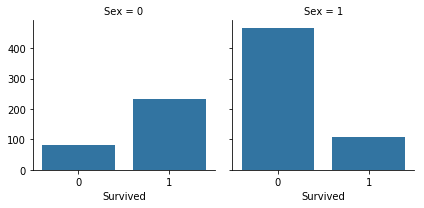

In [38]:
titanic['Sex'] = titanic['Sex'].map({'male': 1, 'female': 0})
sns.FacetGrid(titanic, col='Sex').map(sns.countplot, 'Survived', order=[0,1]);

## Age (Before/After fillna with mean)

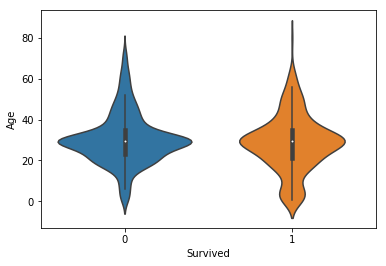

In [39]:
sns.violinplot(x='Survived', y='Age', data=titanic);

## SibSp

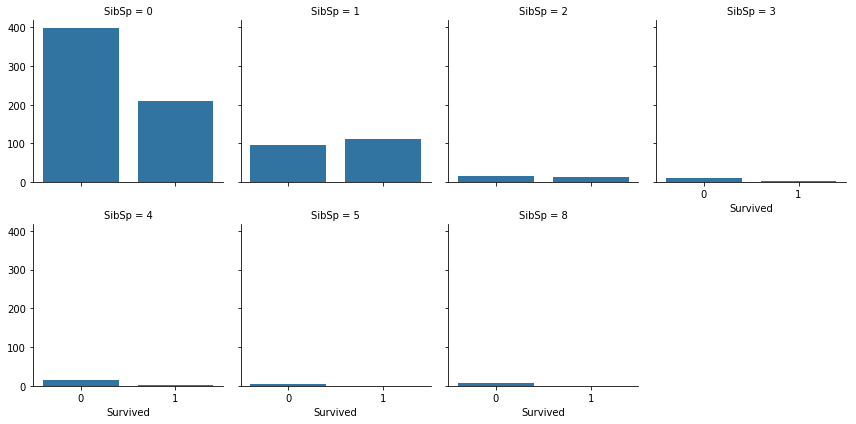

In [40]:
sns.FacetGrid(titanic, col='SibSp', col_wrap=4).map(sns.countplot, 'Survived', order=[0,1]);

## Parch

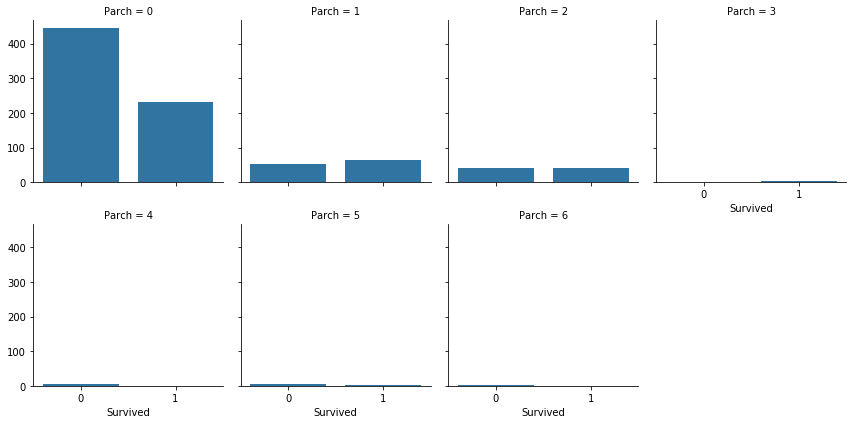

In [41]:
sns.FacetGrid(titanic, col='Parch', col_wrap=4).map(sns.countplot, 'Survived', order=[0,1]);

## Fare

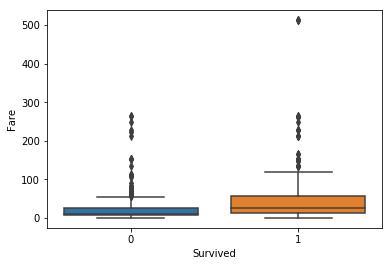

In [42]:
sns.boxplot(x='Survived', y='Fare', data=titanic);

## Embarked

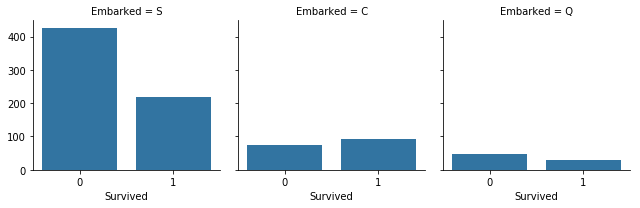

In [43]:
# Analysis
sns.FacetGrid(titanic, col='Embarked').map(sns.countplot, 'Survived', order=[0,1]);

# One-hot encoding
col = 'Embarked'
one_hot = pd.get_dummies(titanic[col], prefix=col)
titanic = pd.concat([titanic, one_hot], axis=1).drop(col, axis=1)

---

# Processed data

In [44]:
titanic.sample(10)

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
883,0,1,28.000000,0,0,10.5000,0,1,0,0,0,1
579,1,1,32.000000,0,0,7.9250,0,0,1,0,0,1
840,0,1,20.000000,0,0,7.9250,0,0,1,0,0,1
771,0,1,48.000000,0,0,7.8542,0,0,1,0,0,1
385,0,1,18.000000,0,0,73.5000,0,1,0,0,0,1
80,0,1,22.000000,0,0,9.0000,0,0,1,0,0,1
602,0,1,29.699118,0,0,42.4000,1,0,0,0,0,1
642,0,0,2.000000,3,2,27.9000,0,0,1,0,0,1
223,0,1,29.699118,0,0,7.8958,0,0,1,0,0,1
677,1,0,18.000000,0,0,9.8417,0,0,1,0,0,1


In [45]:
titanic.corr().Survived.sort_values(ascending=False)

Survived      1.000000
Pclass_1      0.285904
Fare          0.257307
Embarked_C    0.168240
Pclass_2      0.093349
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.069809
Embarked_S   -0.149683
Pclass_3     -0.322308
Sex          -0.543351
Name: Survived, dtype: float64

In [46]:
titanic.corr().Survived.abs().sort_values(ascending=False)

Survived      1.000000
Sex           0.543351
Pclass_3      0.322308
Pclass_1      0.285904
Fare          0.257307
Embarked_C    0.168240
Embarked_S    0.149683
Pclass_2      0.093349
Parch         0.081629
Age           0.069809
SibSp         0.035322
Embarked_Q    0.003650
Name: Survived, dtype: float64

---

# Designed Rules

In [51]:
def draw_tree_with_rule(df, rule=None, filename=None):
    if rule is not None:
        df = df[df.apply(rule, axis=1)==df.Survived]
    
    target = 'Survived'
    X, y = df.drop(target, axis=1), df[target]
    
    dtc = DecisionTreeClassifier(max_depth=4, random_state=0)
    dtc.fit(X, y)

    dot_data = StringIO()
    export_graphviz(dtc, 
                    out_file=dot_data,  
                    filled=True, 
                    feature_names=list(X),
                    class_names=['die','survive'],
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    
    if filename is not None:
        graph.write_pdf(filename)

    return Image(graph.create_png())

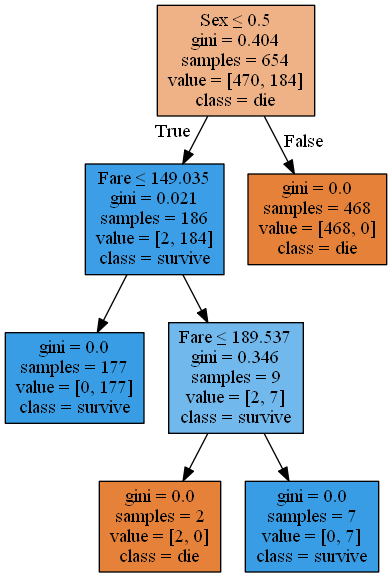

In [52]:
rule = lambda x:\
    0 if x.Sex > 0.5 else\
    1 if x.Pclass_1 < 0.5 else\
    0 if x.Pclass_3 > 0.5 else\
    1 if x.Embarked_C > 0.5 else\
    0
draw_tree_with_rule(titanic.copy(), rule)

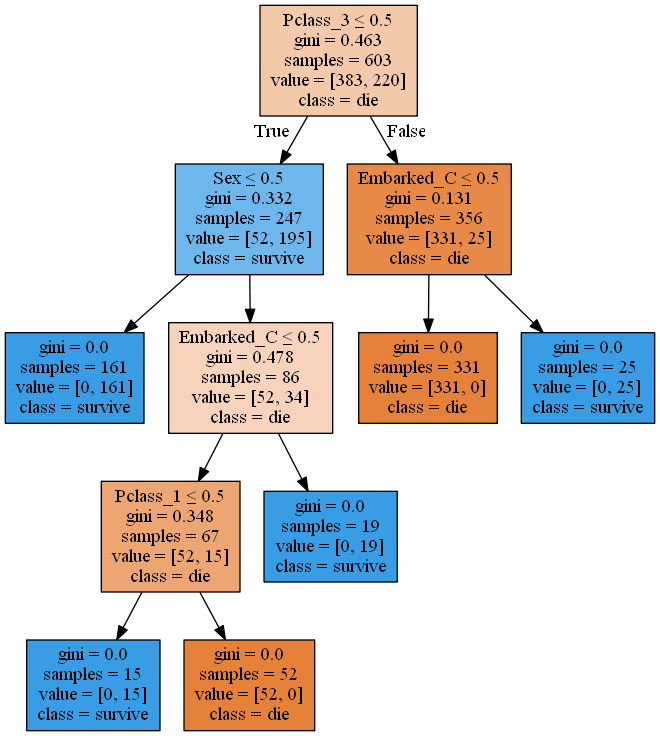

In [49]:
rule = lambda x:\
    1 if x.Embarked_C > 0.5 else\
    0 if x.Pclass_3 > 0.5 else\
    1 if x.Pclass_1 < 0.5 else\
    0 if x.Sex > 0.5 else\
    1
draw_tree_with_rule(titanic.copy(), rule)

In [50]:
assert False, 'breakpoint'

AssertionError: breakpoint

# Other Classifiers

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators=100,
                             max_depth=len(X.columns),
#                              min_samples_split=round(len(X_train)*0.01),
#                              min_samples_leaf=round(len(X_train)*0.01),
                             max_features=None,
                             max_leaf_nodes=None,
                             n_jobs=-1,
                            )
cross_val_n_fold(rfc)

## SVM

In [ ]:
svc = SVC(C=1.0,
          kernel='linear',
          gamma='scale',
          max_iter=-1,
         )
cross_val_n_fold(svc)

## Logistic Regression (aka logit, MaxEnt) classifier

In [ ]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
cross_val_n_fold(lr)

## Linear classifiers (SVM, logistic regression, a.o.) with SGD training

In [ ]:
sgdc = SGDClassifier(n_jobs=-1, max_iter=10000, early_stopping=True)
cross_val_n_fold(sgdc)

## Multi-layer Perceptron classifier

In [ ]:
mlpc = MLPClassifier(hidden_layer_sizes=(100,),
                     activation='tanh',
                    )
cross_val_n_fold(mlpc)

## AdaBoost classifier

In [ ]:
abc = AdaBoostClassifier()
cross_val_n_fold(abc)

## Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
cross_val_n_fold(gnb)

## Quadratic Discriminant Analysis

In [ ]:
qda = QuadraticDiscriminantAnalysis()
cross_val_n_fold(qda)

## Gradient Boosting for classification

In [ ]:
gbc = GradientBoostingClassifier()
cross_val_n_fold(gbc)